# Email Spam Filter

Dataset was downloaded from: https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

## Loading Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('emails.csv')
df.shape

(5172, 3002)

In [7]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


## Preprocessing Data

Deleting unwanted Email No. column to prevent model malfunction due to char input

In [9]:
df = df.drop(df.columns[0],axis='columns')
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


No missing inputs were present in the dataset

In [85]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing

Series([], dtype: int64)

## Data Analysis

In this dataset a prediction value of one indicates a spam email while a value of zero indicates a non-spam email. To get an understanding of the dataset, the 20 of the most correlated and least correlated words to the prediction column are displayed. A heatmap was not used as there are simply too many columns for the visual effect to be useful. 

<Axes: >

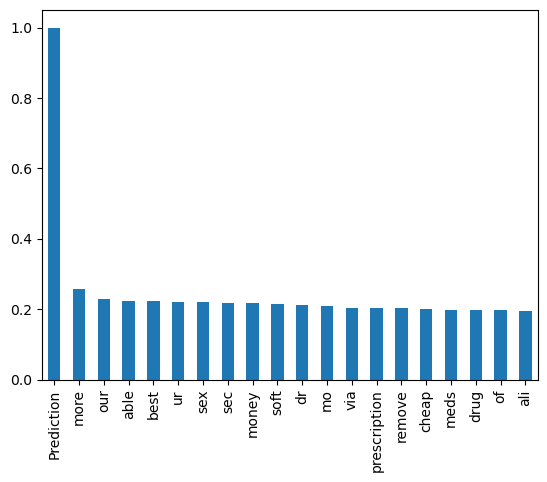

In [90]:
correlations = df.corrwith(df["Prediction"]).sort_values(ascending=False)
correlations[:20].plot.bar()

<Axes: >

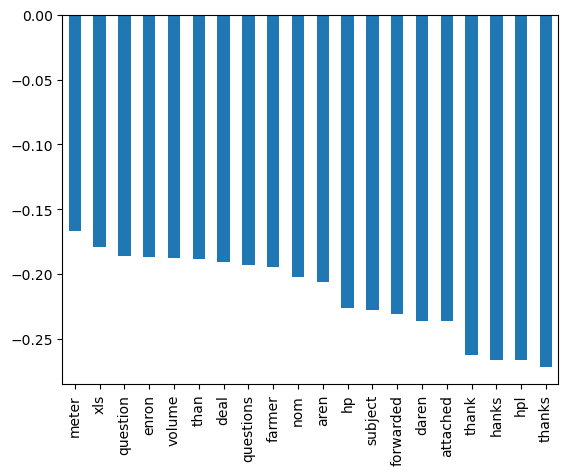

In [91]:
correlations[-20:].plot.bar()

Words related to interesting prospects such as more, sex, best and money are shown to have a large correlation with an email being spam. Oppositely, words related to personal greeting such as thanks as well as typical business email diction like forwarded, attached and question are indicative of an email being non-spam.

### Finding Most Common words in Spam and Non-Spam Emails

<Axes: >

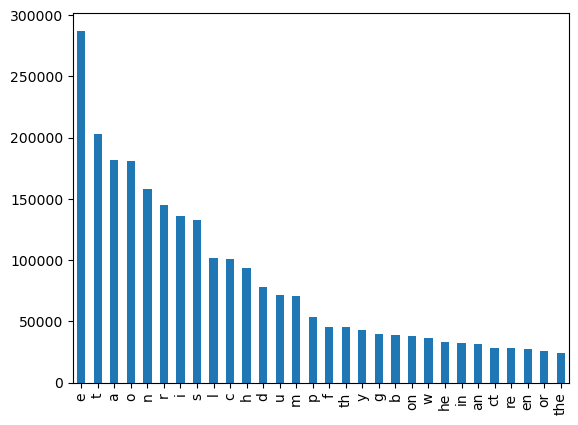

In [107]:
spam_emails = df[df['Prediction'] == 1]
spam_count = spam_emails.sum().sort_values(ascending=False)
spam_count[:30].plot.bar()

<Axes: >

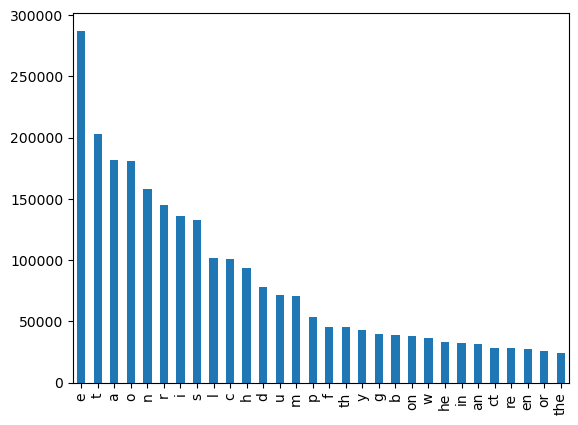

In [108]:
spam_emails = df[df['Prediction'] == 0]
spam_count = spam_emails.sum().sort_values(ascending=False)
spam_count[:30].plot.bar()

In both spam and non-spam emails letter data instead of word data dominates the first 30 entries preventing meaningful data extraction. To gather actual data, the 30-60th of the most common words in spam and not spam need to be seen.   

<Axes: >

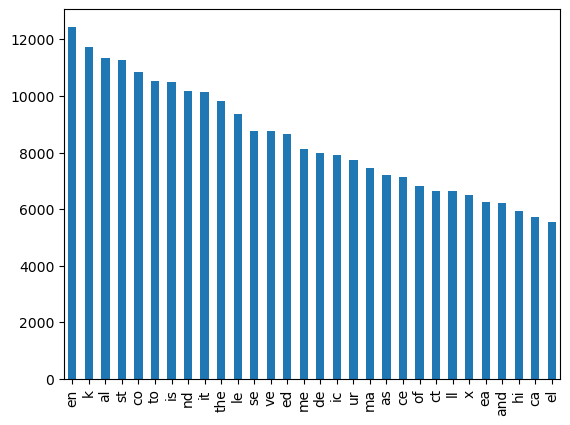

In [111]:
spam_emails = df[df['Prediction'] == 1]
spam_count = spam_emails.sum().sort_values(ascending=False)
spam_count[30:60].plot.bar()

<Axes: >

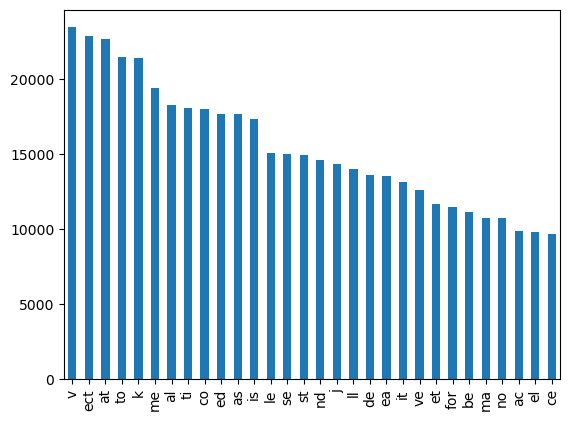

In [110]:
spam_emails = df[df['Prediction'] == 0]
spam_count = spam_emails.sum().sort_values(ascending=False)
spam_count[30:60].plot.bar()

There is no persistent trend relating the most common words in a spam or not spam email. Although the words are not common across the specific type of email, conjunctions, pronouns and prepositions are present in both graphs indicating that such categories are not indicative of an email being spam or not. 

## Feature Engineering

Common groups of words are grouped into a singular column to reduce the number of columns as common words present in both types of emails are not particularly neccessary for spam detection. 

In [10]:
df2 = df.copy()
df2['prepositions'] = df['for'] + df['to'] + df['of'] + df['at'] + df['in'] 
+ df['with'] + df['at'] + df['by'] + df['as'] + df['above'] + df['about'] 
+ df['after'] + df['around'] + df['before'] + df['between'] + df['down'] 
+ df['from'] + df['in'] + df['into'] + df['of'] + df['off'] + df['on']  
+ df['out'] + df['over'] + df['under'] + df['up'] + df['but'] + df['like'] 
+ df['regarding'] + df['since'] + df['within']

df2 = df2.drop(['for', 'to','of','at', 'in',
          'with','at','by','as','above','about', 
          'after','around','before','between','down', 
          'from','in','into','of','off','on',  
          'out','over','under','up','but','like', 
          'regarding','since','within'],axis='columns')

df2.head()                                             

,the,ect,and,a,you,hou,is,this,enron,i,...,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction,prepositions
0,0,1,0,2,0,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,8,24,6,102,1,27,13,0,1,61,...,0,0,0,0,0,0,1,0,0,51
2,0,1,0,8,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,6
3,0,22,0,51,2,10,9,2,0,16,...,0,0,0,0,0,0,0,0,0,14
4,7,17,1,57,0,9,2,2,0,30,...,0,0,0,0,0,0,1,0,0,23


In [12]:
df3 = df2.copy()
df3['pronouns'] = df2['i'] + df2['we'] + df2['you'] + df2['he'] + df2['she'] 
+ df2['it'] + df2['they'] + df2['me'] + df2['us'] + df2['you'] + df2['her'] 
+ df2['him'] + df2['it'] + df2['them'] + df2['mine'] + df2['our'] 
+ df2['your'] + df2['her'] + df2['his'] + df2['their'] + df2['my'] + df2['myself']  
+ df2['yourself'] + df2['itself'] + df2['both'] + df2['each'] + df2['either'] + df2['everyone'] 
+ df2['everything'] + df2['few'] + df2['one']+ df2['other'] + df2['others'] + df2['some']
+ df2['someone'] + df2['such'] + df2['most']

df3 = df3.drop(['i','we','you','he','she', 
                'it','they','me','us','you','her', 
                'him','it','them','mine','our','your',
                'her','his','their','my','myself',
                'yourself','itself','both','each','either',
                'everyone','everything','few','one','other',
                'others','some','someone','such','most'],axis='columns')
df3.head()

,the,ect,and,a,hou,is,this,enron,be,that,...,valued,lay,infrastructure,military,allowing,ff,dry,Prediction,prepositions,pronouns
0,0,1,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,8,24,6,102,27,13,0,1,4,2,...,0,0,0,0,0,1,0,0,51,85
2,0,1,0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,8
3,0,22,0,51,10,9,2,0,2,0,...,0,0,0,0,0,0,0,0,14,25
4,7,17,1,57,9,2,2,0,8,0,...,0,0,0,0,0,1,0,0,23,37


In [13]:
df4 = df3.copy()
df4['interjections'] = df4['hi'] + df4['ok'] 

df4 = df4.drop(['hi','ok'], axis='columns')

df4.head()

,the,ect,and,a,hou,is,this,enron,be,that,...,lay,infrastructure,military,allowing,ff,dry,Prediction,prepositions,pronouns,interjections
0,0,1,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1,8,24,6,102,27,13,0,1,4,2,...,0,0,0,0,1,0,0,51,85,4
2,0,1,0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,8,0
3,0,22,0,51,10,9,2,0,2,0,...,0,0,0,0,0,0,0,14,25,2
4,7,17,1,57,9,2,2,0,8,0,...,0,0,0,0,1,0,0,23,37,2


In [14]:
df5 = df4.copy()
df5['conjunctions'] = df4['and'] + df4['or'] + df4['nor'] + df4['because'] 
+ df4['if'] + df4['although'] + df4['than'] + df4['that'] + df4['though'] 
+ df4['till'] + df4['unless'] + df4['until'] + df4['when'] 
+ df4['where'] + df4['while'] + df4['or'] + df4['whether']

df5 = df5.drop(['and','or','nor','because','if','although','than','that','though', 
          'till','unless','until','when','where','while','or','whether'],axis='columns')

df5.head()

,the,ect,a,hou,is,this,enron,be,will,have,...,infrastructure,military,allowing,ff,dry,Prediction,prepositions,pronouns,interjections,conjunctions
0,0,1,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1,8,24,102,27,13,0,1,4,0,0,...,0,0,0,1,0,0,51,85,4,28
2,0,1,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,8,0,0
3,0,22,51,10,9,2,0,2,0,1,...,0,0,0,0,0,0,14,25,2,10
4,7,17,57,9,2,2,0,8,0,2,...,0,0,0,1,0,0,23,37,2,7


Dropping letter data that confounds with the word data given in the spam email dataset

In [15]:
df6 = df5.copy()
df6 = df5.drop(['b','c','d','e','f','g','h','j','k','l',
                'm','n','o','p','q','r','s','t','u','v','w',
                'x','y','z'],axis='columns')

## Model Selection

### Data Processing

In [26]:
X = df6.drop('Prediction',axis='columns')
X.shape

(5172, 2900)

In [27]:
y = df6.Prediction
y.shape

(5172,)

In [19]:
from sklearn.model_selection import train_test_split, KFold,cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

### Model Evaluation Functions

In [20]:
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return rmse

In [68]:
from sklearn.metrics import mean_squared_error

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

### Finding Optimal Model Parameters

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'Multinominal_NB' : {
            'model': MultinomialNB(),
            'params': {
                'alpha': [0.0001, 0.0005, 0.01, 0.05, 1, 5, 10, 50, 100, 500]
            }
        },
        'SVM': {
            'model': SVC(),
            'params': {
                'C': [1e-4, 0.001, 0.01, 1, 10, 100, 1000],
                'kernel': ['linear', 'poly', 'rbf']
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = KFold(n_splits=5, shuffle=True, random_state=99)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,Multinominal_NB,0.955143,{'alpha': 0.0001}
1,SVM,0.971382,"{'C': 0.01, 'kernel': 'linear'}"
2,decision_tree,0.933487,{'splitter': 'random'}


In [42]:
from sklearn.linear_model import LogisticRegressionCV
from datetime import datetime

logRegression = LogisticRegressionCV(max_iter=1000,
                                     cv=kfolds)

multiNB = MultinomialNB(alpha=0.0001)

svc = SVC(C=0.01,
          kernel='linear')

decision_tree = DecisionTreeClassifier(splitter = 'random')

### Calculating Error with Tuned Models

In [44]:
lrscore = cv_rmse(logRegression)
print("LogisticRegression: ({})\n mean {:.5f}\n std: {:.5f}".format(datetime.now(),lrscore.mean(), lrscore.std()))

mnbscore = cv_rmse(multiNB)
print("Multinomial Naive Bayes: ({})\n mean {:.5f}\n std: {:.5f}".format(datetime.now(),mnbscore.mean(), mnbscore.std()))

svcscore = cv_rmse(svc)
print("Support Vector Classification: ({})\n mean {:.5f}\n std: {:.5f}".format(datetime.now(),svcscore.mean(), svcscore.std()))

decisionTreeScore = cv_rmse(decision_tree)
print("Decision Tree: ({})\n mean {:.5f}\n std: {:.5f}".format(datetime.now(),decisionTreeScore.mean(), decisionTreeScore.std()))

LogisticRegression: (2023-07-25 15:13:55.890471)
 mean 0.15411
 std: 0.01506
Multinomial Naive Bayes: (2023-07-25 15:13:57.840006)
 mean 0.21019
 std: 0.02205
Support Vector Classification: (2023-07-25 15:15:22.992225)
 mean 0.17211
 std: 0.01252
Decision Tree: (2023-07-25 15:15:36.210518)
 mean 0.25865
 std: 0.01393


In [70]:
print("Fitting Models")

print("Logistic Regression")
lgr_full_trained = logRegression.fit(X_train,y_train)

print("Multinominal Naive Bayes")
multiNB_full_trained = multiNB.fit(X_train,y_train)

print("Support Vector Machine Classification")
svc_full_trained = svc.fit(X_train,y_train)

print("Decision Tree")
decision_tree_full_trained = decision_tree.fit(X_train,y_train)

Fitting Models
Logistic Regression
Multinominal Naive Bayes
Support Vector Machine Classification
Decision Tree


### Stacking Hypertuned Models

In [71]:
from sklearn.ensemble import StackingClassifier

estimator = [
    ('lgr_full_trained',lgr_full_trained),
    ('multiNB_full_trained',multiNB_full_trained),
    ('svc_full_trained',svc_full_trained),
    ('decision_tree_full_trained',decision_tree_full_trained)]

stack_model = StackingClassifier(estimators=estimator, cv=kfolds, final_estimator=lgr_full_trained)

stack_score = cv_rmse(stack_model)
print("Stacked Models: ({})\n mean {:.5f}\n std: {:.5f}".format(datetime.now(),stack_score.mean(), stack_score.std()))

Stacked Models: (2023-07-28 07:51:12.302150)
 mean 0.13686
 std: 0.01475


In [72]:
stack_model.fit(X_train,y_train)

StackingClassifier(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimators=[('lgr_full_trained',
                                LogisticRegressionCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                                                     max_iter=1000)),
                               ('multiNB_full_trained',
                                MultinomialNB(alpha=0.0001)),
                               ('svc_full_trained',
                                SVC(C=0.01, kernel='linear')),
                               ('decision_tree_full_trained',
                                DecisionTreeClassifier(splitter='random'))],
                   final_estimator=LogisticRegressionCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                                                        max_iter=1000))

### Final Testing and Model Selection

In [73]:
lrscore = lgr_full_trained.score(X_test,y_test)
rmsle_lr = rmsle(y_test, lgr_full_trained.predict(X_test))

mnbscore = multiNB_full_trained.score(X_test,y_test)
rmsle_mnb = rmsle(y_test, multiNB_full_trained.predict(X_test))

svcscore = svc_full_trained.score(X_test,y_test)
rmsle_svc = rmsle(y_test, svc_full_trained.predict(X_test))

decisionTreeScore = decision_tree_full_trained.score(X_test,y_test)
rmsle_decisionTree = rmsle(y_test, decision_tree_full_trained.predict(X_test))

stack_score = stack_model.score(X_test,y_test,sample_weight=None)
rmsle_stack = rmsle(y_test, stack_model.predict(X_test))

final_scores = {
    'model': ['Logistic Regression', 'Multonominal Naive Bayes', 
              'Support Vector Machine Classification', 'Decision Tree', 'Stacked Model'],
    'scores': [lrscore, mnbscore, svcscore, decisionTreeScore, stack_score],
    'rmsle': [rmsle_lr, rmsle_mnb, rmsle_svc, rmsle_decisionTree, rmsle_stack]
}

final_score = pd.DataFrame.from_dict(final_scores)
final_score

,model,scores,rmsle
0,Logistic Regression,0.975845,0.155417
1,Multonominal Naive Bayes,0.952657,0.217584
2,Support Vector Machine Classification,0.970048,0.173066
3,Decision Tree,0.935266,0.254429
4,Stacked Model,0.978744,0.145795


When considering both the accuracy score as well as the root mean squared error the stacked model performed better than all other models. Therefore this model is chosen to be used as the spam email recognizer. 

## Exporting Model and Dataframe Columns

In [74]:
import pickle
with open('stack_model.pickle','wb') as f:
    pickle.dump(stack_model,f)

In [76]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("word_columns.json","w") as f:
    f.write(json.dumps(columns))